# Using pycisTopic on the Combined dataset

### Set Up Environment

In [1]:
#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
null = open(os.devnull,'wb')

# set the working directory (now set locally)
work_dir = '/g/scb/zaugg/deuner/SCENIC+/'
# set tmp directory
tmp_dir = '/g/scb/zaugg/deuner/SCENIC+/tmp/combined/'
# set the figures directory
fig_dir = '/g/scb/zaugg/deuner/SCENIC+/figures/'

In [2]:
# Load libraries
import scanpy as sc
import numpy as np
import matplotlib.pyplot as pl
from scipy import io
import pandas as pd

## Creating a cisTopic object and topic modelling

In [4]:
# Start by reading cell metadata from the scRNA-seq
adata = sc.read_h5ad(os.path.join(tmp_dir, 'combined.nomicro.adata.h5ad'))

# Set barcodes as cell names (remove sample name)
# new_names = []
# for i in range(len(adata.obs_names)):
#     new_name =  str.split(adata.obs_names[i], "_")[1] #adata.obs_names[i][11:]
#     new_names.append(new_name)

# adata.obs_names = new_names

# cell names: rna barcodes, barcode column: atac barcodes
scRNA_bc = adata.obs.barcode
cell_data = adata.obs
cell_data['wsnn_res.8'] = cell_data['wsnn_res.8'].astype(str) # set data type of the celltype column to str, otherwise the export_pseudobulk function will complain.
del(adata)

In [5]:
cell_data['sample_id'] = cell_data['orig.ident']#.astype(str)

In [6]:
scRNA_bc

timecourse_AAACAGCCAGCCAGTT      AAACCGTACCCGCTGT
timecourse_AAACAGCCAGGCGAGT      GTAGGTTACCCGCTGT
timecourse_AAACAGCCAGTAAAGC      CTAGTAAACCCGCTGT
timecourse_AAACAGCCATAAGTCT      TGGCATGACCCGCTGT
timecourse_AAACAGCCATAGGCGA      TTTGTGCACCCGCTGT
                                       ...       
cocultured28_TTTGTGAAGTCTATGA    AGCAATTGACACCTAC
cocultured28_TTTGTGGCAGCAAGTG    TGATTAGACACCAAAC
cocultured28_TTTGTGTTCTCGCCTG    GTTAAAGCTTGAGAAC
cocultured28_TTTGTGTTCTTAGCCC    ACTAAGACTTGAGAAC
cocultured28_TTTGTGTTCTTGCAGG    AAGGAAGCTTGAGAAC
Name: barcode, Length: 22367, dtype: category
Categories (22127, object): ['AAACATGCTATGTCCA', 'AAACATGCTCACACAC', 'AAACATGCTCTATTGA', 'AAACCATGAAACCGCA', ..., 'TTTGTGTGAGTCCCTG', 'TTTGTGTGATAGACTG', 'TTTGTGTGATCACACC', 'TTTGTGTGATGAATGC']

In [7]:
cell_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,pANN_0.25_0.005_794,...,wsnn_res.9,wsnn_res.10,wsnn_res.12,wsnn_res.14,wsnn_res.16,wsnn_res.18,wsnn_res.20,celltype_wnn,barcode,sample_id
timecourse_AAACAGCCAGCCAGTT,timecourse,5020.0,2676,6.155378,3.705179,6037.0,2676,7,25,0.084507,...,48,44,31,27,51,35,25,diff-NPC,AAACCGTACCCGCTGT,timecourse
timecourse_AAACAGCCAGGCGAGT,timecourse,4719.0,2179,0.190718,0.466200,6032.0,2178,14,117,0.239437,...,96,96,109,114,120,115,117,neuron-1,GTAGGTTACCCGCTGT,timecourse
timecourse_AAACAGCCAGTAAAGC,timecourse,3832.0,2004,0.287056,0.730689,5979.0,2008,12,50,0.183099,...,34,32,26,23,14,62,50,diff-neuron,CTAGTAAACCCGCTGT,timecourse
timecourse_AAACAGCCATAAGTCT,timecourse,7329.0,3535,1.159776,1.132487,7247.0,3535,8,151,0.154930,...,47,49,50,47,34,147,151,hiPSC-2,TGGCATGACCCGCTGT,timecourse
timecourse_AAACAGCCATAGGCGA,timecourse,4511.0,2253,7.337619,1.906451,6061.0,2253,7,51,0.140845,...,11,12,41,36,70,52,51,diff-NPC,TTTGTGCACCCGCTGT,timecourse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cocultured28_TTTGTGAAGTCTATGA,cocultured28,11717.0,3893,0.162158,0.187761,7918.0,3746,5,72,NaN,...,22,14,55,49,107,105,72,neuron-2,AGCAATTGACACCTAC,cocultured28
cocultured28_TTTGTGGCAGCAAGTG,cocultured28,6845.0,2998,0.613587,0.555150,6845.0,2998,14,85,NaN,...,88,89,100,103,105,93,85,neuron-4,TGATTAGACACCAAAC,cocultured28
cocultured28_TTTGTGTTCTCGCCTG,cocultured28,9557.0,3435,0.292979,0.282515,7697.0,3433,6,39,NaN,...,15,70,79,78,73,50,39,neuron-3,GTTAAAGCTTGAGAAC,cocultured28
cocultured28_TTTGTGTTCTTAGCCC,cocultured28,1732.0,1112,2.078522,0.577367,5364.0,1614,6,123,NaN,...,33,61,29,21,45,73,123,neuron-3,ACTAAGACTTGAGAAC,cocultured28


In [7]:
# set (RNA) barcodes as cell names


In [8]:
# Load scATAC-seq data
import pickle
fragments_dict = {'timecourse': os.path.join(work_dir, 'inputdata/timecourse_fragments_translated_ordered4.tsv'),
                 'Neuron': os.path.join(work_dir, 'inputdata/Neuron_fragments_translated_ordered5.tsv'),
                 'NPC': os.path.join(work_dir, 'inputdata/NPC_fragments_translated_ordered5.tsv'),
                 'cocultured28': os.path.join(work_dir, 'inputdata/cocultured28_fragments_translated_ordered5.tsv')}
path_to_regions = {'timecourse':os.path.join(tmp_dir, 'scATAC/consensus_peak_calling/consensus_regions.bed'),
                  'Neuron':os.path.join(tmp_dir, 'scATAC/consensus_peak_calling/consensus_regions.bed'),
                  'NPC':os.path.join(tmp_dir, 'scATAC/consensus_peak_calling/consensus_regions.bed'),
                  'cocultured28':os.path.join(tmp_dir, 'scATAC/consensus_peak_calling/consensus_regions.bed')}
metadata_bc = pickle.load(open(os.path.join(tmp_dir, 'scATAC/quality_control/metadata_bc.pkl'), 'rb'))
bc_passing_filters = pickle.load(open(os.path.join(tmp_dir, 'scATAC/quality_control/bc_passing_filters.pkl'), 'rb'))

In [9]:
#print(f"{len(list(set(bc_passing_filters['timecourse']) + list(set(bc_passing_filters['Neuron'])) + list(set(bc_passing_filters['NPC'])) + list(set(bc_passing_filters['cocultured29'])) & set(scRNA_bc)))} cell barcodes pass both scATAC-seq and scRNA-seq based filtering")

In [9]:
# # Create cisTopic Object
from pycisTopic.cistopic_class import *
# key = ['timecourse', 'Neuron', 'NPC', 'cocultured28']
# cistopic_obj = create_cistopic_object_from_fragments(
#                             path_to_fragments=fragments_dict[key],
#                             path_to_regions=path_to_regions[key],
#                             metrics=metadata_bc[key],
#                             valid_bc=list(set(bc_passing_filters[key]) & set(scRNA_bc)),
#                             n_cpu=1,
#                             project=key,
#                             split_pattern="_")

# https://github.com/aertslab/pycisTopic/blob/master/notebooks/Cortex_pycisTopic.ipynb
cistopic_obj_list=[create_cistopic_object_from_fragments(path_to_fragments=fragments_dict[key],
                                               path_to_regions=path_to_regions[key],
                                               metrics=metadata_bc[key],
                                               valid_bc=list(set(bc_passing_filters[key]) & set(scRNA_bc)),
                                               n_cpu=1,
                                               project=key,
                                               split_pattern="_") for key in fragments_dict.keys()]

2023-05-17 16:20:40,896 cisTopic     INFO     Reading data for timecourse
2023-05-17 16:24:33,458 cisTopic     INFO     metrics provided!
2023-05-17 16:24:46,401 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-05-17 16:24:58,095 cisTopic     INFO     Counting fragments in regions


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2023-05-17 16:26:12,115 cisTopic     INFO     Creating fragment matrix


/g/scb/zaugg/deuner/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pycisTopic/cistopic_class.py:881: PerformanceWarning: The following operation may generate 5444662431 cells in the resulting pandas object.
  counts_df.groupby(["Name", "regionID"], sort=False, observed=True)


2023-05-17 16:38:26,415 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-05-17 16:39:06,826 cisTopic     INFO     Creating CistopicObject
2023-05-17 16:39:10,276 cisTopic     INFO     Done!
2023-05-17 16:39:10,996 cisTopic     INFO     Reading data for Neuron
2023-05-17 16:41:28,412 cisTopic     INFO     metrics provided!
2023-05-17 16:41:39,236 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-05-17 16:41:48,188 cisTopic     INFO     Counting fragments in regions


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2023-05-17 16:42:48,474 cisTopic     INFO     Creating fragment matrix


/g/scb/zaugg/deuner/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pycisTopic/cistopic_class.py:881: PerformanceWarning: The following operation may generate 3052934325 cells in the resulting pandas object.
  counts_df.groupby(["Name", "regionID"], sort=False, observed=True)


2023-05-17 16:44:22,792 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-05-17 16:44:43,051 cisTopic     INFO     Creating CistopicObject
2023-05-17 16:44:46,763 cisTopic     INFO     Done!
2023-05-17 16:44:46,917 cisTopic     INFO     Reading data for NPC
2023-05-17 16:46:54,468 cisTopic     INFO     metrics provided!
2023-05-17 16:47:04,938 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-05-17 16:47:12,330 cisTopic     INFO     Counting fragments in regions


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2023-05-17 16:48:04,883 cisTopic     INFO     Creating fragment matrix


/g/scb/zaugg/deuner/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pycisTopic/cistopic_class.py:881: PerformanceWarning: The following operation may generate 5976624660 cells in the resulting pandas object.
  counts_df.groupby(["Name", "regionID"], sort=False, observed=True)


2023-05-17 16:57:32,712 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-05-17 16:58:03,188 cisTopic     INFO     Creating CistopicObject
2023-05-17 16:58:06,654 cisTopic     INFO     Done!
2023-05-17 16:58:06,839 cisTopic     INFO     Reading data for cocultured28
2023-05-17 16:59:36,700 cisTopic     INFO     metrics provided!
2023-05-17 16:59:43,701 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-05-17 16:59:48,671 cisTopic     INFO     Counting fragments in regions


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2023-05-17 17:00:11,205 cisTopic     INFO     Creating fragment matrix


/g/scb/zaugg/deuner/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pycisTopic/cistopic_class.py:881: PerformanceWarning: The following operation may generate 2423907005 cells in the resulting pandas object.
  counts_df.groupby(["Name", "regionID"], sort=False, observed=True)


2023-05-17 17:00:40,076 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-05-17 17:00:52,528 cisTopic     INFO     Creating CistopicObject
2023-05-17 17:00:54,867 cisTopic     INFO     Done!


In [11]:
# # remove duplicated sample name in cell names
# for obj in cistopic_obj_list:
#     dup_names = obj.cell_names 
#     new_names = []
#     for name in dup_names:
#         new_names.append(str.split(name, "_")[0])

#     obj.cell_names = new_names

In [10]:
# merge cistopic objects into a single object
cistopic_obj = merge(cistopic_obj_list, split_pattern = "_")

2023-05-17 17:03:33,659 cisTopic     INFO     cisTopic object 1 merged
2023-05-17 17:03:44,332 cisTopic     INFO     cisTopic object 2 merged
2023-05-17 17:03:54,922 cisTopic     INFO     cisTopic object 3 merged


In [11]:
cell_data.index

Index(['timecourse_AAACAGCCAGCCAGTT', 'timecourse_AAACAGCCAGGCGAGT',
       'timecourse_AAACAGCCAGTAAAGC', 'timecourse_AAACAGCCATAAGTCT',
       'timecourse_AAACAGCCATAGGCGA', 'timecourse_AAACAGCCATCACAGC',
       'timecourse_AAACATGCAACTAGCC', 'timecourse_AAACATGCAAGACTCC',
       'timecourse_AAACATGCAGCACCAT', 'timecourse_AAACATGCAGCATTAT',
       ...
       'cocultured28_TTTGTCTAGGCGCTTA', 'cocultured28_TTTGTCTAGTGCACGC',
       'cocultured28_TTTGTGAAGCTTAGTA', 'cocultured28_TTTGTGAAGGGTGAAC',
       'cocultured28_TTTGTGAAGGGTGGAT', 'cocultured28_TTTGTGAAGTCTATGA',
       'cocultured28_TTTGTGGCAGCAAGTG', 'cocultured28_TTTGTGTTCTCGCCTG',
       'cocultured28_TTTGTGTTCTTAGCCC', 'cocultured28_TTTGTGTTCTTGCAGG'],
      dtype='object', length=22367)

In [12]:
scRNA_bc

timecourse_AAACAGCCAGCCAGTT      AAACCGTACCCGCTGT
timecourse_AAACAGCCAGGCGAGT      GTAGGTTACCCGCTGT
timecourse_AAACAGCCAGTAAAGC      CTAGTAAACCCGCTGT
timecourse_AAACAGCCATAAGTCT      TGGCATGACCCGCTGT
timecourse_AAACAGCCATAGGCGA      TTTGTGCACCCGCTGT
                                       ...       
cocultured28_TTTGTGAAGTCTATGA    AGCAATTGACACCTAC
cocultured28_TTTGTGGCAGCAAGTG    TGATTAGACACCAAAC
cocultured28_TTTGTGTTCTCGCCTG    GTTAAAGCTTGAGAAC
cocultured28_TTTGTGTTCTTAGCCC    ACTAAGACTTGAGAAC
cocultured28_TTTGTGTTCTTGCAGG    AAGGAAGCTTGAGAAC
Name: barcode, Length: 22367, dtype: category
Categories (22127, object): ['AAACATGCTATGTCCA', 'AAACATGCTCACACAC', 'AAACATGCTCTATTGA', 'AAACCATGAAACCGCA', ..., 'TTTGTGTGAGTCCCTG', 'TTTGTGTGATAGACTG', 'TTTGTGTGATCACACC', 'TTTGTGTGATGAATGC']

In [15]:
len(list(set(cell_data['barcode']) & set(cistopic_obj.cell_names))) > 1

False

In [16]:
len(list(set(cell_data['barcode']) & set([x.split('_')[0] for x in cistopic_obj.cell_names]))) > 0 

True

In [13]:
cell_data.index

Index(['timecourse_AAACAGCCAGCCAGTT', 'timecourse_AAACAGCCAGGCGAGT',
       'timecourse_AAACAGCCAGTAAAGC', 'timecourse_AAACAGCCATAAGTCT',
       'timecourse_AAACAGCCATAGGCGA', 'timecourse_AAACAGCCATCACAGC',
       'timecourse_AAACATGCAACTAGCC', 'timecourse_AAACATGCAAGACTCC',
       'timecourse_AAACATGCAGCACCAT', 'timecourse_AAACATGCAGCATTAT',
       ...
       'cocultured28_TTTGTCTAGGCGCTTA', 'cocultured28_TTTGTCTAGTGCACGC',
       'cocultured28_TTTGTGAAGCTTAGTA', 'cocultured28_TTTGTGAAGGGTGAAC',
       'cocultured28_TTTGTGAAGGGTGGAT', 'cocultured28_TTTGTGAAGTCTATGA',
       'cocultured28_TTTGTGGCAGCAAGTG', 'cocultured28_TTTGTGTTCTCGCCTG',
       'cocultured28_TTTGTGTTCTTAGCCC', 'cocultured28_TTTGTGTTCTTGCAGG'],
      dtype='object', length=22367)

In [14]:
cistopic_obj.cell_names[:5]

['TCAATTGCTCCTGAGT_timecourse',
 'TGAACCGACTATCCTG_timecourse',
 'GGATTAGTGGCTTTAA_timecourse',
 'AAGCCTAACTAATCAG_timecourse',
 'GGCGGTTACCTGGATG_timecourse']

In [19]:
#cell_data.index = scRNA_bc   # this line solved metadata addition problem 


In [15]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,barcode
TCAATTGCTCCTGAGT_timecourse,4379,3.641375,4223,3.625621,timecourse,5.885086,3.764699,767513,5817,761696,0.992421,470578,3350,0.575898,8.808442,TCAATTGCTCCTGAGT
TGAACCGACTATCCTG_timecourse,6794,3.832126,6382,3.804957,timecourse,6.076014,3.931000,1191281,8531,1182750,0.992839,781384,5182,0.607432,11.280257,TGAACCGACTATCCTG
GGATTAGTGGCTTTAA_timecourse,13338,4.125091,12398,4.093352,timecourse,6.460567,4.310375,2887798,20435,2867363,0.992924,1642543,11197,0.547932,6.489622,GGATTAGTGGCTTTAA
AAGCCTAACTAATCAG_timecourse,20864,4.319398,18769,4.273441,timecourse,6.590419,4.477411,3894208,30020,3864188,0.992291,2496161,19777,0.658794,7.255888,AAGCCTAACTAATCAG
GGCGGTTACCTGGATG_timecourse,5564,3.745387,5296,3.723948,timecourse,6.012438,3.860398,1029054,7251,1021803,0.992954,655078,4457,0.614674,8.519124,GGCGGTTACCTGGATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATGAAGGAGGCCCTT_cocultured28,1379,3.139564,1329,3.123525,cocultured28,5.496168,3.312177,313450,2052,311398,0.993454,190524,1164,0.567251,7.057453,GATGAAGGAGGCCCTT
CTGTATTGATCCTAAT_cocultured28,2584,3.412293,2482,3.394802,cocultured28,5.666258,3.515609,463722,3278,460444,0.992931,336729,2166,0.660769,8.937737,CTGTATTGATCCTAAT
CCTAAGCCTTGAGGTA_cocultured28,3171,3.501196,2980,3.474216,cocultured28,5.762289,3.605089,578481,4028,574453,0.993037,413668,2706,0.671797,11.122157,CCTAAGCCTTGAGGTA
TCCACAATGCGTGATT_cocultured28,1693,3.228657,1653,3.218273,cocultured28,5.499695,3.323458,316006,2106,313900,0.993336,220009,1345,0.638651,8.865128,TCCACAATGCGTGATT


In [21]:
# # remove sample id from barcodes to avoid problems with add_cell_data
# old_names = cistopic_obj.cell_data.index
# new_names = []
# for name in old_names:
#     new_names.append(str.split(name, "_")[0])
# cistopic_obj.cell_data.index = new_names
# cistopic_obj.cell_names = new_names

In [22]:
cell_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,pANN_0.25_0.005_794,...,wsnn_res.9,wsnn_res.10,wsnn_res.12,wsnn_res.14,wsnn_res.16,wsnn_res.18,wsnn_res.20,celltype_wnn,barcode,sample_id
NPC_TGATGAACACCTATAG,NPC,7888.0,3703,5.337221,7.264199,7521.0,3703,1,105,NaN,...,67,26,24,79,74,65,105,NPC-3,GCTCGTTACCATTACC,NPC
Neuron_CCCTGGACAGGACCAA,Neuron,6155.0,2707,4.126726,0.503656,6409.0,2707,2,44,NaN,...,51,48,35,32,20,16,44,neuron-5,ACCGAATACGCTTGGG,Neuron
timecourse_TCCGCCATCCAAGTTA,timecourse,9927.0,4071,1.067795,3.646620,7839.0,4068,1,3,0.366197,...,30,28,14,13,6,5,3,hiPSC-2,CTATTAGCTATGGCTT,timecourse
cocultured28_GCTGGTTCAGGCGATA,cocultured28,9908.0,3447,2.775535,0.272507,7716.0,3446,6,109,NaN,...,42,45,85,87,111,99,109,neuron-3,TCAATCCACGGGCGTT,cocultured28
cocultured28_TCTTGTCCAGCACGTT,cocultured28,33559.0,6871,0.441014,0.187729,7548.0,3295,5,143,NaN,...,101,103,118,121,136,136,143,neuron-3,CTTACTGACATAAAGG,cocultured28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPC_GCATTGCCATTGACAT,NPC,4870.0,2690,4.702259,4.702259,5988.0,2690,4,13,NaN,...,72,67,52,37,25,22,13,NPC-2,GCAATTGACGTGGTTA,NPC
NPC_GCAGGAAGTAGGTGTC,NPC,11199.0,4468,8.938298,10.152692,7964.0,4376,1,33,NaN,...,14,26,24,85,83,81,33,NPC-3,ATGGGCGTGGCGGAAC,NPC
cocultured28_GAAGTATAGTAAGTGG,cocultured28,9366.0,3541,0.629938,0.181508,7766.0,3540,5,148,NaN,...,21,18,119,122,137,140,148,neuron-2,CAGTTAGGATCAATCT,cocultured28
timecourse_CGCATGATCCTTCGTA,timecourse,5905.0,2565,11.075360,1.558002,6312.0,2565,7,165,0.098592,...,3,6,27,31,56,160,165,diff-NPC,TTAGGTTCTAAGTGGC,timecourse


In [23]:
# # Make sure all fields are strings (although this is hacky...)
# cistopic_obj.cell_data["sample_id"] = cistopic_obj.cell_data["sample_id"].astype(str)
#cell_data["sample_id"] = cell_data["sample_id"].astype(str)


In [24]:
# The indexes in the pandas data frame to add can be cell barcodes (if the cisTopic object has been created from a fragments file only) or an exact match with the cell names in the cisTopic object (cistopic_obj.cell_names).
#cell_data['barcode'] = cell_data['barcode'] + '_' + cell_data['sample_id'] #[x.split('_')[1] for x in cell_data.index.tolist()]

In [25]:
cell_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,pANN_0.25_0.005_794,...,wsnn_res.9,wsnn_res.10,wsnn_res.12,wsnn_res.14,wsnn_res.16,wsnn_res.18,wsnn_res.20,celltype_wnn,barcode,sample_id
NPC_TGATGAACACCTATAG,NPC,7888.0,3703,5.337221,7.264199,7521.0,3703,1,105,NaN,...,67,26,24,79,74,65,105,NPC-3,GCTCGTTACCATTACC,NPC
Neuron_CCCTGGACAGGACCAA,Neuron,6155.0,2707,4.126726,0.503656,6409.0,2707,2,44,NaN,...,51,48,35,32,20,16,44,neuron-5,ACCGAATACGCTTGGG,Neuron
timecourse_TCCGCCATCCAAGTTA,timecourse,9927.0,4071,1.067795,3.646620,7839.0,4068,1,3,0.366197,...,30,28,14,13,6,5,3,hiPSC-2,CTATTAGCTATGGCTT,timecourse
cocultured28_GCTGGTTCAGGCGATA,cocultured28,9908.0,3447,2.775535,0.272507,7716.0,3446,6,109,NaN,...,42,45,85,87,111,99,109,neuron-3,TCAATCCACGGGCGTT,cocultured28
cocultured28_TCTTGTCCAGCACGTT,cocultured28,33559.0,6871,0.441014,0.187729,7548.0,3295,5,143,NaN,...,101,103,118,121,136,136,143,neuron-3,CTTACTGACATAAAGG,cocultured28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPC_GCATTGCCATTGACAT,NPC,4870.0,2690,4.702259,4.702259,5988.0,2690,4,13,NaN,...,72,67,52,37,25,22,13,NPC-2,GCAATTGACGTGGTTA,NPC
NPC_GCAGGAAGTAGGTGTC,NPC,11199.0,4468,8.938298,10.152692,7964.0,4376,1,33,NaN,...,14,26,24,85,83,81,33,NPC-3,ATGGGCGTGGCGGAAC,NPC
cocultured28_GAAGTATAGTAAGTGG,cocultured28,9366.0,3541,0.629938,0.181508,7766.0,3540,5,148,NaN,...,21,18,119,122,137,140,148,neuron-2,CAGTTAGGATCAATCT,cocultured28
timecourse_CGCATGATCCTTCGTA,timecourse,5905.0,2565,11.075360,1.558002,6312.0,2565,7,165,0.098592,...,3,6,27,31,56,160,165,diff-NPC,TTAGGTTCTAAGTGGC,timecourse


In [16]:
old_names = cell_data.index 
new_names = []
for i in range(len(old_names)):
    new_name = cell_data['barcode'][i] + '_' + cell_data['sample_id'][i]
    new_names.append(new_name)
cell_data.index = new_names

In [17]:
cell_data.index

Index(['AAACCGTACCCGCTGT_timecourse', 'GTAGGTTACCCGCTGT_timecourse',
       'CTAGTAAACCCGCTGT_timecourse', 'TGGCATGACCCGCTGT_timecourse',
       'TTTGTGCACCCGCTGT_timecourse', 'TCCAGGAACCCGCTGT_timecourse',
       'TACAACAACCTAAATG_timecourse', 'TCACCATACCTAAATG_timecourse',
       'GTAGTCAACCTAAATG_timecourse', 'ACCCTCAACCTAAATG_timecourse',
       ...
       'GTAATTGGAATTGACA_cocultured28', 'AGACTTAGAATTGACA_cocultured28',
       'GTTAGCGGACACCTAC_cocultured28', 'CATAGTGGACACCTAC_cocultured28',
       'GCGCAATGACACCTAC_cocultured28', 'AGCAATTGACACCTAC_cocultured28',
       'TGATTAGACACCAAAC_cocultured28', 'GTTAAAGCTTGAGAAC_cocultured28',
       'ACTAAGACTTGAGAAC_cocultured28', 'AAGGAAGCTTGAGAAC_cocultured28'],
      dtype='object', length=22367)

In [18]:
len(list(set(cell_data.index) & set(cistopic_obj.cell_names))) > 1

True

In [19]:
cistopic_obj.add_cell_data(cell_data, split_pattern = "_")


Columns ['barcode', 'sample_id'] will be overwritten


In [20]:
cell_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,pANN_0.25_0.005_794,...,wsnn_res.9,wsnn_res.10,wsnn_res.12,wsnn_res.14,wsnn_res.16,wsnn_res.18,wsnn_res.20,celltype_wnn,barcode,sample_id
AAACCGTACCCGCTGT_timecourse,timecourse,5020.0,2676,6.155378,3.705179,6037.0,2676,7,25,0.084507,...,48,44,31,27,51,35,25,diff-NPC,AAACCGTACCCGCTGT,timecourse
GTAGGTTACCCGCTGT_timecourse,timecourse,4719.0,2179,0.190718,0.466200,6032.0,2178,14,117,0.239437,...,96,96,109,114,120,115,117,neuron-1,GTAGGTTACCCGCTGT,timecourse
CTAGTAAACCCGCTGT_timecourse,timecourse,3832.0,2004,0.287056,0.730689,5979.0,2008,12,50,0.183099,...,34,32,26,23,14,62,50,diff-neuron,CTAGTAAACCCGCTGT,timecourse
TGGCATGACCCGCTGT_timecourse,timecourse,7329.0,3535,1.159776,1.132487,7247.0,3535,8,151,0.154930,...,47,49,50,47,34,147,151,hiPSC-2,TGGCATGACCCGCTGT,timecourse
TTTGTGCACCCGCTGT_timecourse,timecourse,4511.0,2253,7.337619,1.906451,6061.0,2253,7,51,0.140845,...,11,12,41,36,70,52,51,diff-NPC,TTTGTGCACCCGCTGT,timecourse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCAATTGACACCTAC_cocultured28,cocultured28,11717.0,3893,0.162158,0.187761,7918.0,3746,5,72,NaN,...,22,14,55,49,107,105,72,neuron-2,AGCAATTGACACCTAC,cocultured28
TGATTAGACACCAAAC_cocultured28,cocultured28,6845.0,2998,0.613587,0.555150,6845.0,2998,14,85,NaN,...,88,89,100,103,105,93,85,neuron-4,TGATTAGACACCAAAC,cocultured28
GTTAAAGCTTGAGAAC_cocultured28,cocultured28,9557.0,3435,0.292979,0.282515,7697.0,3433,6,39,NaN,...,15,70,79,78,73,50,39,neuron-3,GTTAAAGCTTGAGAAC,cocultured28
ACTAAGACTTGAGAAC_cocultured28,cocultured28,1732.0,1112,2.078522,0.577367,5364.0,1614,6,123,NaN,...,33,61,29,21,45,73,123,neuron-3,ACTAAGACTTGAGAAC,cocultured28


In [21]:
cistopic_obj.cell_data


,Dupl_rate,cisTopic_log_nr_acc,Total_nr_frag_in_regions,Log_total_nr_frag,Total_nr_frag,cisTopic_nr_frag,Unique_nr_frag_in_regions,Log_unique_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_frag,...,wsnn_res.9,wsnn_res.10,wsnn_res.12,wsnn_res.14,wsnn_res.16,wsnn_res.18,wsnn_res.20,celltype_wnn,barcode,sample_id
TCAATTGCTCCTGAGT_timecourse,0.992421,3.625621,470578,5.885086,767513,4379,3350,3.764699,4223,3.641375,...,47,49,50,47,34,147,151,hiPSC-2,TCAATTGCTCCTGAGT,timecourse
TGAACCGACTATCCTG_timecourse,0.992839,3.804957,781384,6.076014,1191281,6794,5182,3.931000,6382,3.832126,...,34,32,26,23,14,62,50,diff-neuron,TGAACCGACTATCCTG,timecourse
GGATTAGTGGCTTTAA_timecourse,0.992924,4.093352,1642543,6.460567,2887798,13338,11197,4.310375,12398,4.125091,...,55,40,8,61,50,36,21,hiPSC-1,GGATTAGTGGCTTTAA,timecourse
AAGCCTAACTAATCAG_timecourse,0.992291,4.273441,2496161,6.590419,3894208,20864,19777,4.477411,18769,4.319398,...,50,97,105,113,114,125,115,hiPSC-2,AAGCCTAACTAATCAG,timecourse
GGCGGTTACCTGGATG_timecourse,0.992954,3.723948,655078,6.012438,1029054,5564,4457,3.860398,5296,3.745387,...,8,37,22,70,48,143,156,diff-NPC,GGCGGTTACCTGGATG,timecourse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATGAAGGAGGCCCTT_cocultured28,0.993454,3.123525,190524,5.496168,313450,1379,1164,3.312177,1329,3.139564,...,104,108,127,132,148,157,164,neuron-3,GATGAAGGAGGCCCTT,cocultured28
CTGTATTGATCCTAAT_cocultured28,0.992931,3.394802,336729,5.666258,463722,2584,2166,3.515609,2482,3.412293,...,33,43,29,21,45,73,48,neuron-3,CTGTATTGATCCTAAT,cocultured28
CCTAAGCCTTGAGGTA_cocultured28,0.993037,3.474216,413668,5.762289,578481,3171,2706,3.605089,2980,3.501196,...,22,14,55,49,94,80,90,neuron-2,CCTAAGCCTTGAGGTA,cocultured28
TCCACAATGCGTGATT_cocultured28,0.993336,3.218273,220009,5.499695,316006,1693,1345,3.323458,1653,3.228657,...,15,61,62,57,134,129,136,neuron-3,TCCACAATGCGTGATT,cocultured28


In [22]:
# Save the object
pickle.dump(cistopic_obj,
            open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'wb'))

In [33]:
#ray.shutdown() 
#ray.init()

In [54]:
# Run topic modelling. The purpose of this is twofold:
# 1. To find sets of co-accessible regions (topics), this will be used downstream as candidate enhancers (together with Differentially Accessible Regions (DARs)).
# 2. To impute dropouts.

# THIS STEP IS RUN IN PARALLEL VIA A SLURM JOB

import pickle
cistopic_obj = pickle.load(open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))
from pycisTopic.cistopic_class import *
models=run_cgs_models(cistopic_obj,
                    n_topics=[2,4,10,16,32,48],
                    n_cpu=1, #5
                    n_iter=500,
                    random_state=555,
                    alpha=50,
                    alpha_by_topic=True,
                    eta=0.1,
                    eta_by_topic=False,
                    save_path=None),
                    #_temp_dir = os.path.join(tmp_dir + 'ray_spill'))

2023-05-16 13:50:22,436	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(run_cgs_model pid=4047653) 2023-05-16 13:51:26,074 cisTopic     INFO     Running model with 2 topics
(run_cgs_model pid=4047653) 2023-05-16 13:55:57,638 cisTopic     INFO     Model with 2 topics done!
(run_cgs_model pid=4047653) 2023-05-16 13:55:59,087 cisTopic     INFO     Running model with 4 topics
(run_cgs_model pid=4047653) 2023-05-16 14:05:05,565 cisTopic     INFO     Model with 4 topics done!
(run_cgs_model pid=4047653) 2023-05-16 14:05:07,515 cisTopic     INFO     Running model with 10 topics
(run_cgs_model pid=4047653) 2023-05-16 14:21:35,413 cisTopic     INFO     Model with 10 topics done!
(run_cgs_model pid=4047653) 2023-05-16 14:21:37,055 cisTopic     INFO     Running model with 16 topics
(run_cgs_model pid=4047653) 2023-05-16 14:44:52,906 cisTopic     INFO     Model with 16 topics done!


In [3]:
# Save results
if not os.path.exists(os.path.join(tmp_dir, 'scATAC/models')):
    os.makedirs(os.path.join(tmp_dir, 'scATAC/models'))

pickle.dump(models,
            open(os.path.join(tmp_dir, 'scATAC/models/combined_models_500_iter_LDA.pkl'), 'wb'))

NameError: name 'pickle' is not defined

In [19]:
# create list of the models
topics = [2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
models = []
for topic in topics:
    model = pickle.load(open(os.path.join(tmp_dir, 'scATAC/Topic' + str(topic) + ".pkl"), 'rb'))
    models.append(model)
models

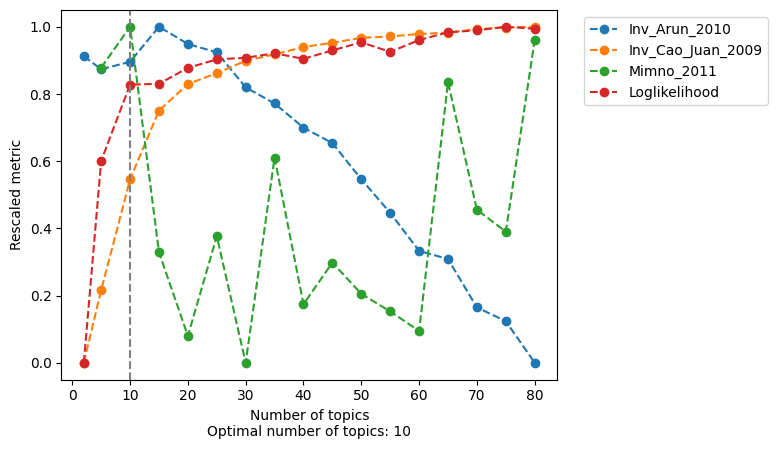

In [20]:
# Analyze models
# We will make use of four quality metrics to select the model with the optimal amount of topics: 1. Arun et al. 2010 2. Cao & Juan et al. 2009 3. Mimno et al. 2011 4. Log likelihood
cistopic_obj = pickle.load(open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))
from pycisTopic.lda_models import *
model = evaluate_models(models,
                       select_model=None, #best model is selected
                       return_model=True,
                       metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                       plot_metrics=False)

In [21]:
# Choose the ??? model
cistopic_obj.add_LDA_model(model)
pickle.dump(cistopic_obj,
            open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'wb'))

## Visualization

2023-05-22 12:45:53,402 cisTopic     INFO     Running UMAP


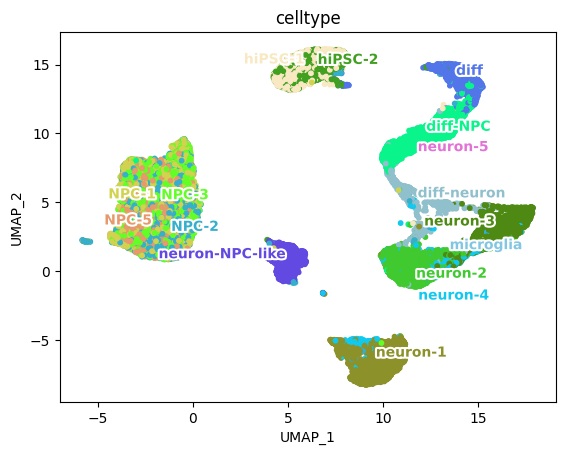

In [22]:
# We can use the cell-topic probabilities to generate dimensionality reductions.
from pycisTopic.clust_vis import *
run_umap(cistopic_obj, target  = 'cell', scale=True)
plot_metadata(cistopic_obj, reduction_name = 'UMAP', variables = ['celltype'])

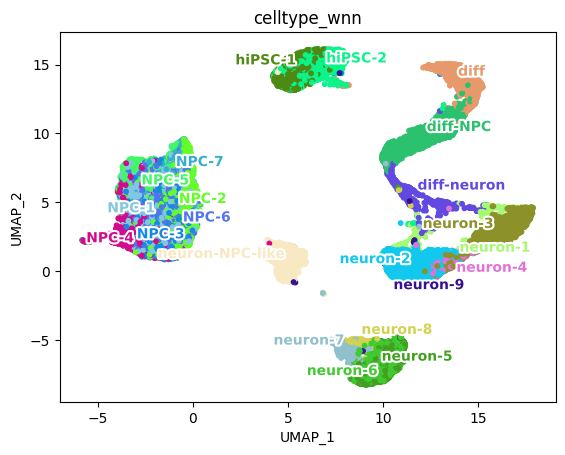

In [23]:
plot_metadata(cistopic_obj, reduction_name = 'UMAP', variables = ['celltype_wnn'])

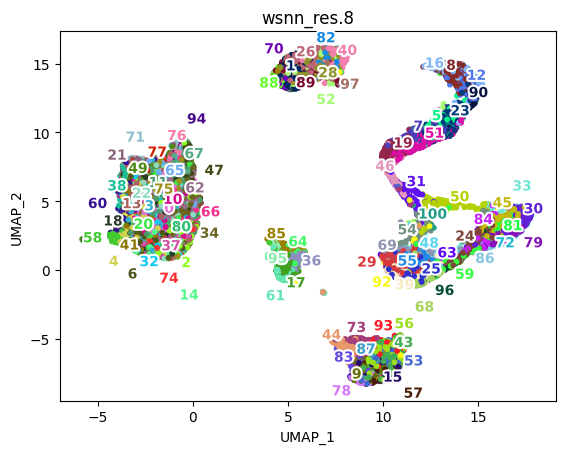

In [24]:
plot_metadata(cistopic_obj, reduction_name = 'UMAP', variables = ['wsnn_res.8'])

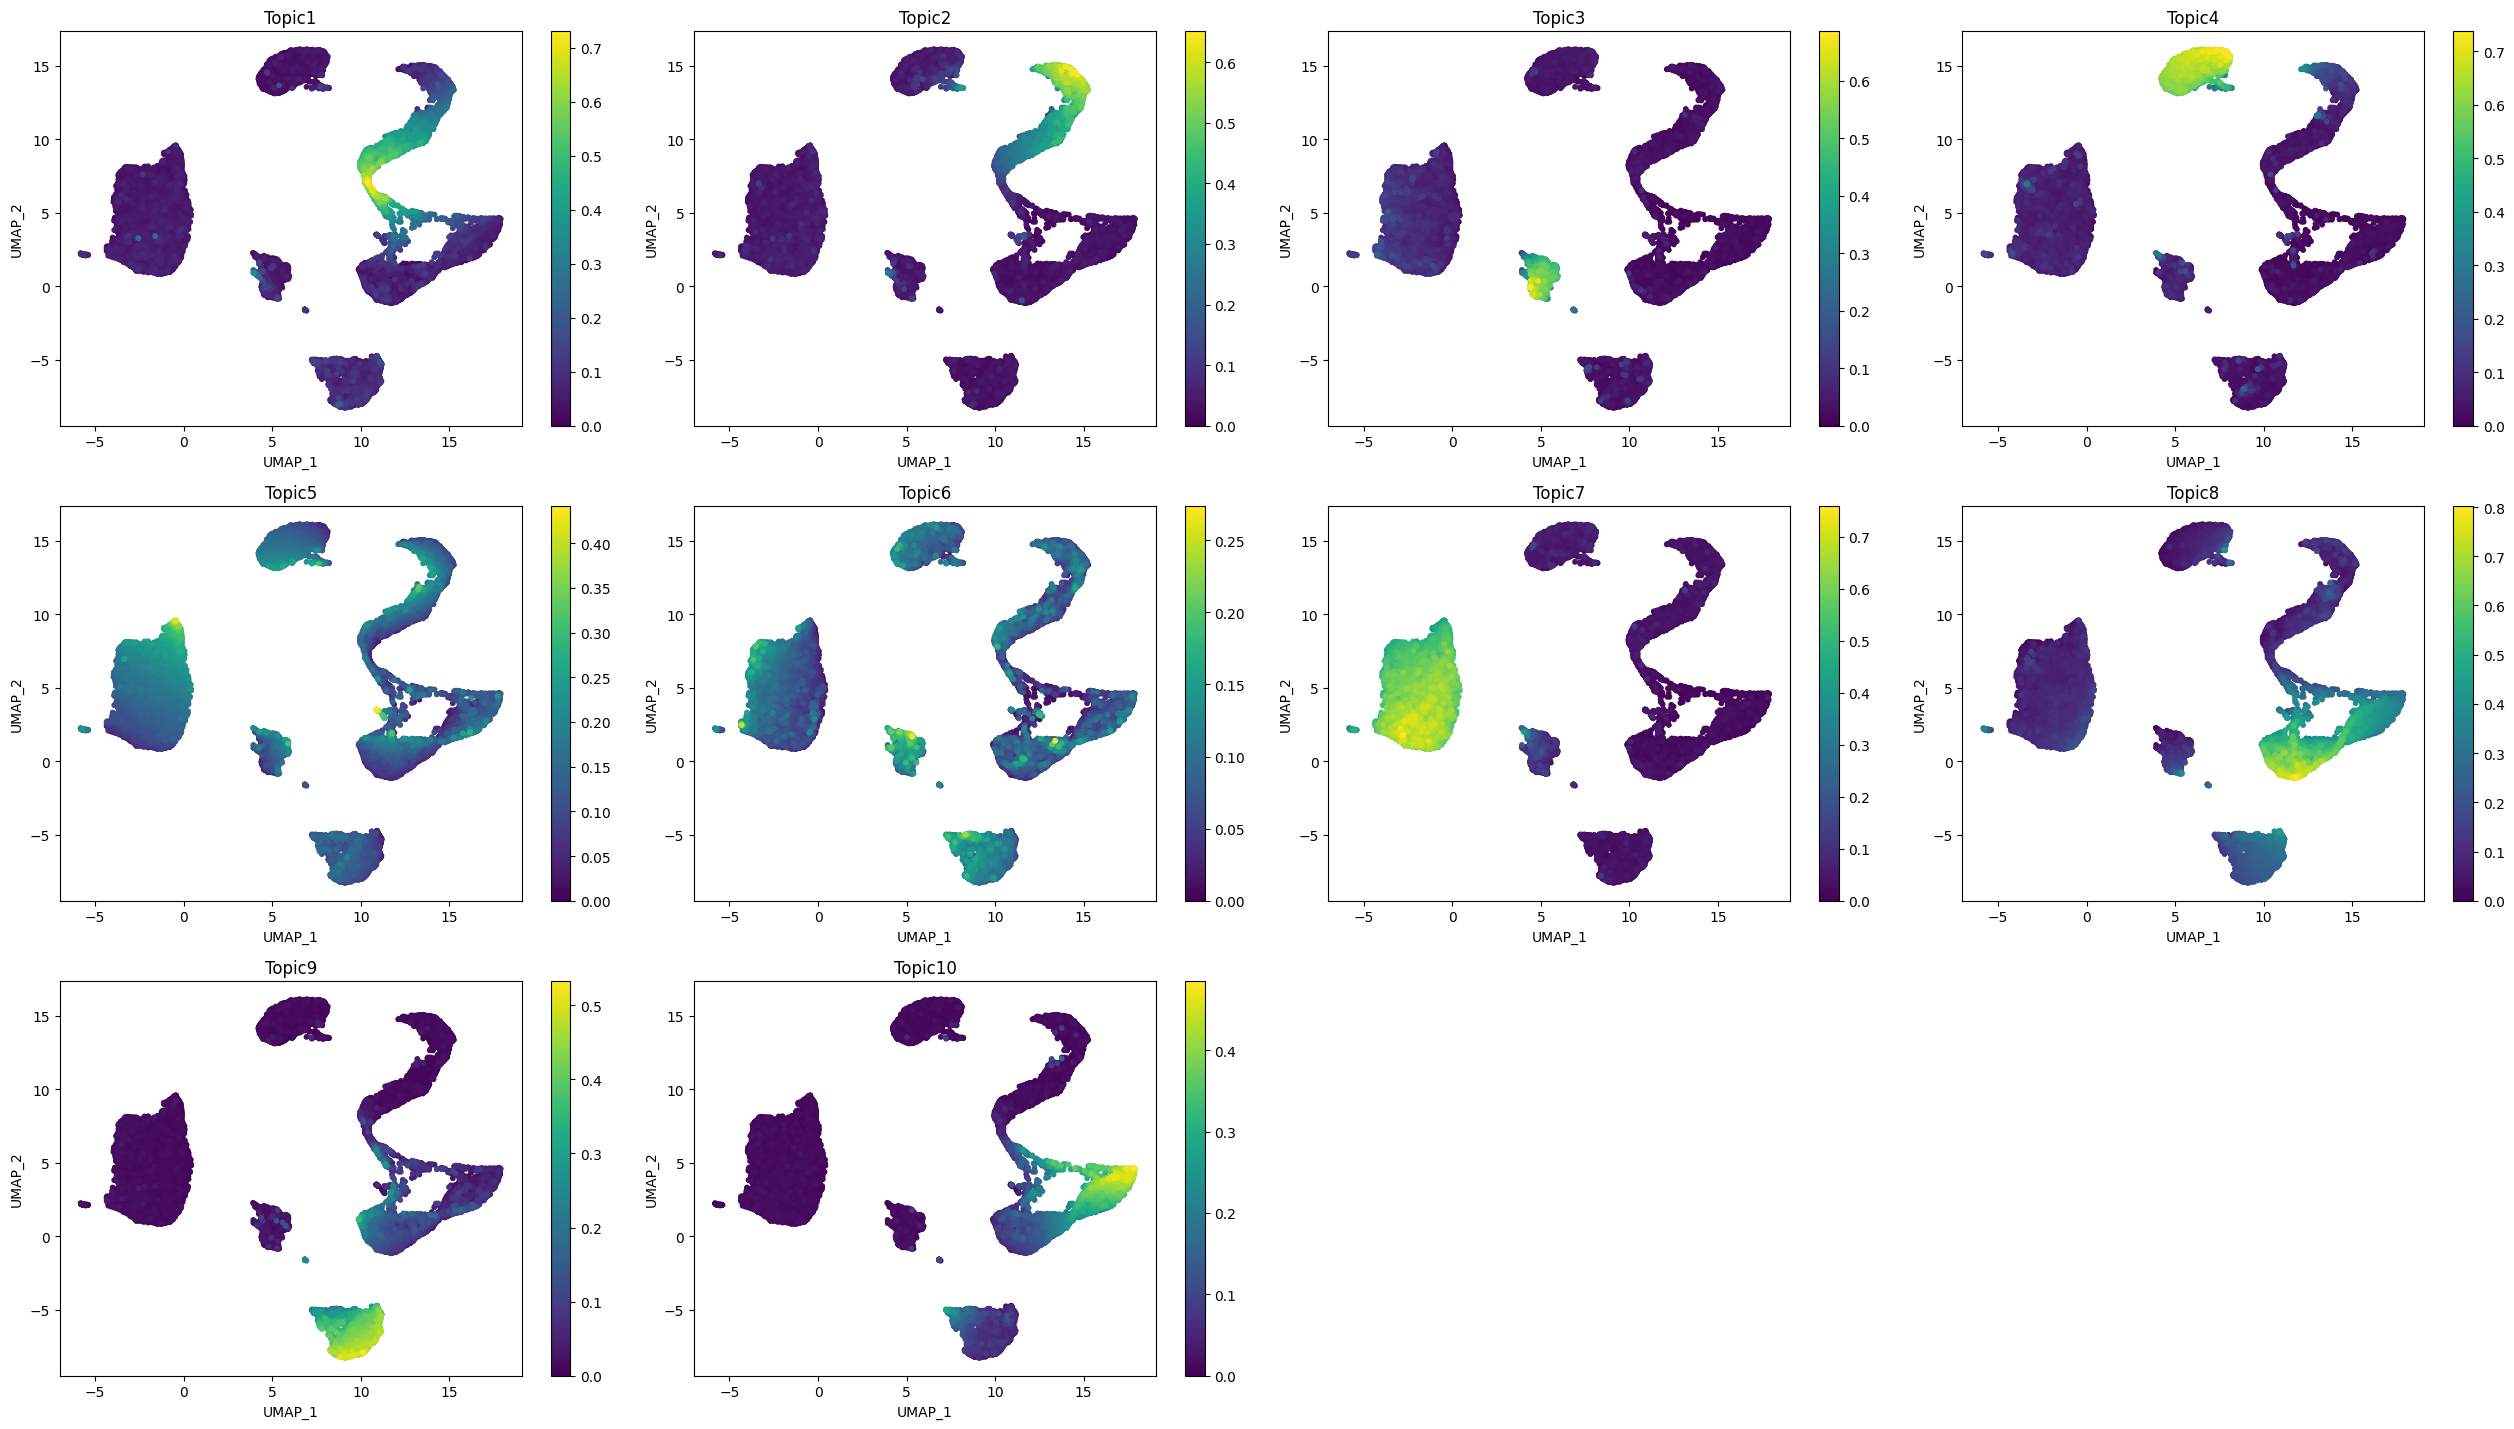

In [25]:
# We can also plot the cell-topic probabilities on the UMAP, to visualize their cell type specifiticy.
plot_topic(cistopic_obj, reduction_name = 'UMAP', num_columns = 4)

## Inferring candidate enhancer regions

In [8]:
cistopic_obj = pickle.load(open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))

In [17]:
pd.Series.unique(cistopic_obj.cell_data["wsnn_res.8"])

array(['52', '46', '1', '28', '7', '72', '33', '51', '8', '70', '12',
       '26', '50', '19', '23', '48', '16', '31', nan, '5', '90', '82',
       '97', '88', '54', '63', '40', '89', '100', '20', '78', '15', '73',
       '9', '87', '36', '83', '43', '56', '85', '57', '17', '64', '61',
       '53', '44', '95', '93', '92', '21', '49', '32', '76', '37', '75',
       '77', '22', '67', '34', '10', '38', '0', '71', '60', '4', '47',
       '94', '65', '74', '11', '3', '2', '62', '66', '80', '13', '18',
       '41', '6', '14', '58', '30', '55', '59', '86', '39', '69', '79',
       '84', '81', '24', '29', '45', '68', '25', '96'], dtype=object)

In [6]:
# Next we will infer candidate enhancer regions by:
# 1. binarization of region-topic probabilites.
# 2. calculation differentially accessibile regions (DARs) per cell type.
# These regions will be used as input for the next step, pycistarget, in which we will look which motifs are enriched in these regions.

# First we will binarize the topics using the otsu method and by taking the top 3k regions per topic.
from pycisTopic.topic_binarization import *
region_bin_topics_otsu = binarize_topics(cistopic_obj, method='otsu')
region_bin_topics_top3k = binarize_topics(cistopic_obj, method='ntop', ntop = 3000)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
# Next we will calculate DARs per cell type
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj, plot = False)


2023-05-22 13:21:24,922 cisTopic     INFO     Imputing drop-outs
2023-05-22 13:25:27,935 cisTopic     INFO     Scaling
2023-05-22 13:26:18,770 cisTopic     INFO     Keep non zero rows
2023-05-22 13:26:57,439 cisTopic     INFO     Imputed accessibility sparsity: 0.6716052894825548
2023-05-22 13:26:57,441 cisTopic     INFO     Create CistopicImputedFeatures object
2023-05-22 13:26:57,441 cisTopic     INFO     Making matrix sparse
2023-05-22 13:40:41,479 cisTopic     INFO     Done!
2023-05-22 13:40:41,605 cisTopic     INFO     Normalizing imputed data
2023-05-22 13:43:54,819 cisTopic     INFO     Done!
2023-05-22 13:45:08,178 cisTopic     INFO     Done!


<Figure size 640x480 with 0 Axes>

In [8]:
markers_dict = find_diff_features(cistopic_obj, imputed_acc_obj, variable='wsnn_res.8', var_features=variable_regions, split_pattern = '_')

2023-05-22 13:46:25,885 cisTopic     INFO     Formatting data for 0
2023-05-22 13:46:36,907 cisTopic     INFO     Computing p-value for 0
2023-05-22 13:48:15,182 cisTopic     INFO     Computing log2FC for 0
2023-05-22 13:48:18,849 cisTopic     INFO     0 done!
2023-05-22 13:48:19,225 cisTopic     INFO     Formatting data for 1
2023-05-22 13:48:30,218 cisTopic     INFO     Computing p-value for 1
2023-05-22 13:50:07,850 cisTopic     INFO     Computing log2FC for 1
2023-05-22 13:50:11,498 cisTopic     INFO     1 done!
2023-05-22 13:50:11,889 cisTopic     INFO     Formatting data for 10
2023-05-22 13:50:23,020 cisTopic     INFO     Computing p-value for 10
2023-05-22 13:51:58,750 cisTopic     INFO     Computing log2FC for 10
2023-05-22 13:52:02,776 cisTopic     INFO     10 done!
2023-05-22 13:52:03,155 cisTopic     INFO     Formatting data for 100
2023-05-22 13:52:13,800 cisTopic     INFO     Computing p-value for 100
2023-05-22 13:53:52,433 cisTopic     INFO     Computing log2FC for 100


In [9]:
markers_dict

{'0':                              Log2FC Adjusted_pval Contrast
 chr7:102232841-102233341   1.589188           0.0        0
 chr10:119805364-119805864  1.588997           0.0        0
 chr15:63037807-63038307    1.588674           0.0        0
 chr16:82695434-82695934    1.588124           0.0        0
 chr2:620042-620542         1.587645           0.0        0
 ...                             ...           ...      ...
 chr11:125062954-125063454  0.585439           0.0        0
 chr11:3642465-3642965      0.585376           0.0        0
 chr2:133674396-133674896    0.58532           0.0        0
 chr17:31095263-31095763    0.585298           0.0        0
 chr18:26575244-26575744    0.585078           0.0        0
 
 [23760 rows x 3 columns],
 '1':                              Log2FC Adjusted_pval Contrast
 chr9:97219597-97220097     3.456637           0.0        1
 chr17:11991364-11991864    3.454802           0.0        1
 chr8:91720174-91720674     3.453166           0.0        1
 

In [10]:
# Save results
if not os.path.exists(os.path.join(tmp_dir, 'scATAC/candidate_enhancers')):
    os.makedirs(os.path.join(tmp_dir, 'scATAC/candidate_enhancers'))
import pickle
pickle.dump(region_bin_topics_otsu, open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'wb'))
pickle.dump(region_bin_topics_top3k, open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'wb'))
pickle.dump(markers_dict, open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/markers_dict.pkl'), 'wb'))

We now completed all the mininal scATAC-seq preprocessing steps.

In particular we:

    1. generated a set of consensus peaks

    2. performed quality control steps, only keeping cell barcods which passed QC metrics in both the scRNA-seq and scATAC-seq assay

    3. performed topic modeling

    4. inferred candidate enhancer regions by binarizing the region-topic probabilities and DARs per cell type

## Motif enrichment analysis using pycistarget

In [3]:
# Load candidate enhancer regions identified in previous step.
import pickle
region_bin_topics_otsu = pickle.load(open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'rb'))
region_bin_topics_top3k = pickle.load(open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'rb'))
markers_dict = pickle.load(open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/markers_dict.pkl'), 'rb'))

In [4]:
# Convert to dictionary of pyranges objects
import pyranges as pr
from pycistarget.utils import region_names_to_coordinates
region_sets = {}
region_sets['topics_otsu'] = {}
region_sets['topics_top_3'] = {}
region_sets['DARs'] = {}
for topic in region_bin_topics_otsu.keys():
    regions = region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets['topics_otsu'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for topic in region_bin_topics_top3k.keys():
    regions = region_bin_topics_top3k[topic].index[region_bin_topics_top3k[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets['topics_top_3'][topic] = pr.PyRanges(region_names_to_coordinates(regions))


In [5]:
for DAR in markers_dict.keys():
    regions = markers_dict[DAR].index[markers_dict[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
    if len(regions) > 0:
        region_sets['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))
        # https://github.com/aertslab/scenicplus/issues/87
#for DAR in markers_dict.keys():
#    #print(DAR)
#    regions = markers_dict[DAR].index[markers_dict[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
#    print(regions)
#    region_sets['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))

In [6]:
regions
region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')]
markers_dict[DAR]

,Log2FC,Adjusted_pval,Contrast
chr6:4503741-4504241,2.690555,0.0,97
chr7:101294655-101295155,2.688065,0.0,97
chr7:105696874-105697374,2.68768,0.0,97
chr2:176646077-176646577,2.686278,0.0,97
chr2:64823694-64824194,2.6859,0.0,97
...,...,...,...
chr1:158078616-158079116,0.585383,0.0,97
chr19:36916168-36916668,0.585229,0.0,97
chr2:96116345-96116845,0.585189,0.0,97
chr14:38208989-38209489,0.585104,0.000214,97


In [7]:
for key in region_sets.keys():
    print(f'{key}: {region_sets[key].keys()}')

topics_otsu: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10'])
topics_top_3: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10'])
DARs: dict_keys(['0', '1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '28', '29', '3', '30', '31', '32', '33', '34', '36', '37', '38', '39', '4', '40', '41', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '92', '93', '94', '95', '96', '97'])


In [8]:
# Define rankings, score and motif annotation database
db_fpath = "/g/scb2/zaugg/deuner/SCENIC+/cistarget_databases/"
motif_annot_fpath = "/g/scb2/zaugg/deuner/SCENIC+/cistarget_databases/"

In [9]:
rankings_db = os.path.join(db_fpath, 'hg38_screen_v10_clust.regions_vs_motifs.rankings.feather')
scores_db =  os.path.join(db_fpath, 'hg38_screen_v10_clust.regions_vs_motifs.scores.feather')
motif_annotation = os.path.join(motif_annot_fpath, 'motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl')

In [10]:
# Run pycistarget using the run_pycistarget wrapper function
if not os.path.exists(os.path.join(tmp_dir, 'motifs')):
    os.makedirs(os.path.join(tmp_dir, 'motifs'))

In [ ]:
from scenicplus.wrappers.run_pycistarget import run_pycistarget
run_pycistarget(
    region_sets = region_sets,
    species = 'homo_sapiens',
    save_path = os.path.join(tmp_dir, 'motifs'),
    ctx_db_path = rankings_db,
    dem_db_path = scores_db,
    path_to_motif_annotations = motif_annotation,
    run_without_promoters = True,
    n_cpu = 1,
    _temp_dir = os.path.join(tmp_dir, 'ray_spill'),
    annotation_version = 'v10nr_clust',
    )

2023-05-24 11:06:54,953 pycisTarget_wrapper INFO     /g/scb/zaugg/deuner/SCENIC+/tmp/combined/motifs folder already exists.
2023-05-24 11:06:55,830 pycisTarget_wrapper INFO     Loading cisTarget database for topics_otsu
2023-05-24 11:06:55,831 cisTarget    INFO     Reading cisTarget database
2023-05-24 11:28:44,578 pycisTarget_wrapper INFO     Running cisTarget for topics_otsu
2023-05-24 11:28:44,580 cisTarget    INFO     Running cisTarget for Topic1 which has 11594 regions
2023-05-24 11:29:10,476 cisTarget    INFO     Annotating motifs for Topic1
2023-05-24 11:29:15,834 cisTarget    INFO     Getting cistromes for Topic1
2023-05-24 11:29:16,540 cisTarget    INFO     Running cisTarget for Topic2 which has 10363 regions
2023-05-24 11:29:36,721 cisTarget    INFO     Annotating motifs for Topic2
2023-05-24 11:29:42,790 cisTarget    INFO     Getting cistromes for Topic2
2023-05-24 11:29:43,261 cisTarget    INFO     Running cisTarget for Topic3 which has 12897 regions
2023-05-24 11:30:04,121

In [ ]:
# Explore some of the results
import dill
menr = dill.load(open(os.path.join(tmp_dir, 'motifs/menr.pkl'), 'rb'))

In [ ]:
menr['DEM_topics_otsu_All'].DEM_results('Topic2')

We now have completed all the steps necessary for starting the SCENIC+ analysis ?.

In particalular, we have

preprocessed the scRNA-seq side of the data, selecting high quality cells and annotation these cells.

preprocessed the scATAC-seq side of the data, selecting high quality cells, performing topic modeling and identifying candidate enhacer regions.

looked for enriched motifs in candidate enhancer regions.

In the next section we will combine all these analysis and run SCENIC+